# Handwritten digits

We're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

In [1]:
from matplotlib import pyplot as plt
from matplotlib import offsetbox
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\loren\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\loren\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Let's load the dataset first.

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.data.shape)
print(digits.keys())

(1797, 8, 8)
(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


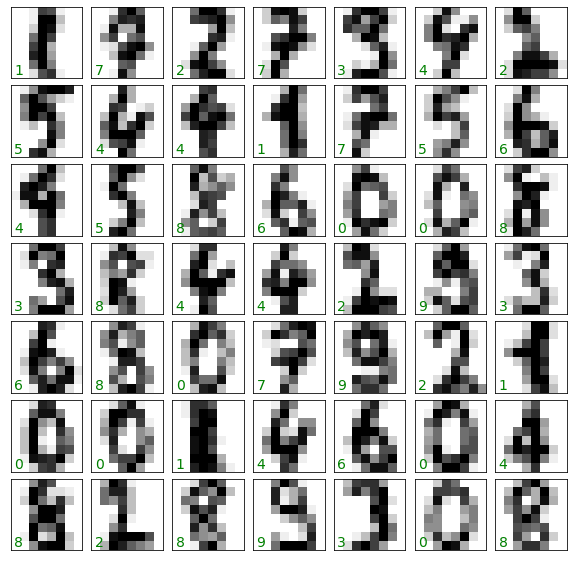

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],49)
np.random.seed()

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

### Unsupervised Learning: Dimensionality Reduction on Digits

First, we're going to use **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold.

In [4]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
digits_transformed = embedding.fit_transform(digits.data)
print(digits_transformed.shape)

C:\Users\loren\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\loren\anaconda3\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


Let's look at the result.

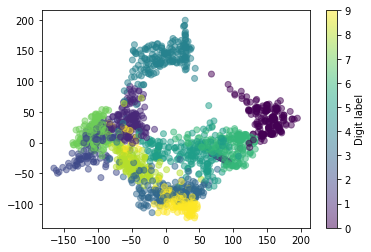

In [5]:
plt.scatter(digits_transformed[:,0], digits_transformed[:,1], c=digits.target, alpha=0.5)
plt.colorbar(label='Digit label')

### Supervised Learning: Classification on Digits

Now we want to classify the dataset.

Here we split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


Now we use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [7]:
clf = LogisticRegression(penalty='l2', max_iter=2000, solver='sag').fit(X_train, y_train)

Let's compute the accuracy (`sklearn.metrics.accuracy_score`) of our emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Here we compute the accuracy on both the training and the test set.

In [8]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

y_predtrain = clf.predict(X_train)
acc_train = accuracy_score(y_train, y_predtrain)
print('The accuracy on the test set is: ', acc)
print('The accuracy on the training set is: ', acc_train)

The accuracy on the test set is:  0.9638888888888889
The accuracy on the training set is:  1.0


From the results above it can be noticed that both sets have a very high match with the true set of labels, with the training set being absolutely perfect.

But since accuracy is only a number, it does not tell us where we could be wrong. Hence, it is convenient to compute the **confusion matrix**.

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


From here i can see that:
- 27 "0s" are classified as "0s"
- 32 "1s" are classified as "1s", 1 as "8" and 2 as "9s". Moreover, 1 "6" and 2 "8s" are classified as "1"
- 35 "2s" are classified as "2s", 1 as "3", and 1 "8" is classified as "2"

and so on.

I can also say that the most challenging digits to identify, in this test, were "1" and "9", which makes perfectly sense, since they are the most confusing type of drawings for a number.

To visualize this:

C:\Users\loren\AppData\Local\Temp\ipykernel_23424\1667510149.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test, y_pred)),


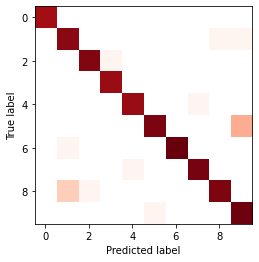

In [10]:
plt.imshow(np.log(confusion_matrix(y_test, y_pred)), 
           cmap='Reds', interpolation='nearest')
plt.ylabel('True label')
plt.xlabel('Predicted label');

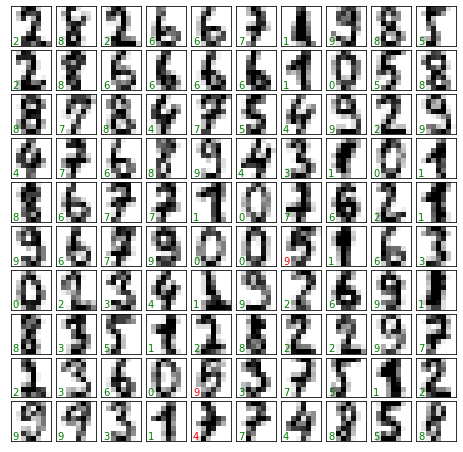

In [11]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]), transform=ax.transAxes, 
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

Another classifier would be [`K-Nearest Neighboor (kNN)`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [12]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)
pred_knn = knn.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)

y_predtrain = knn.predict(X_train)
acc_train = accuracy_score(y_train, y_predtrain)

print('The accuracy on the test set is: ', acc)
print('The accuracy on the training set is: ', acc_train)

The accuracy on the test set is:  0.975
The accuracy on the training set is:  0.9902574808629089


In [14]:
print(confusion_matrix(y_test, y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  2  0  0  0  1 35  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


C:\Users\loren\AppData\Local\Temp\ipykernel_23424\1667510149.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test, y_pred)),


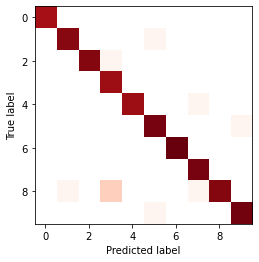

In [15]:
plt.imshow(np.log(confusion_matrix(y_test, y_pred)), 
           cmap='Reds', interpolation='nearest')
plt.ylabel('True label')
plt.xlabel('Predicted label');

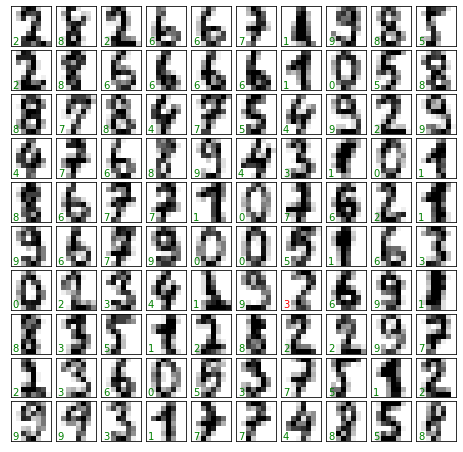

In [17]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]), transform=ax.transAxes, 
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

From these results, the better performing model seems to be the K-Nearest Neighboor classifier.